In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from ggplot import *
import seaborn as sbn
import altair
import numpy as np
import json
pd.set_option('max_columns',50)

In [2]:
fs = pd.read_excel('chapter-12-relay-foods.xlsx',sheetname='Purchase Data - Full Study')
fs.head()

,OrderId,OrderDate,UserId,TotalCharges,CommonId,PupId,PickupDate
0,262,2009-01-11,47,50.67,TRQKD,2,2009-01-12
1,278,2009-01-20,47,26.60,4HH2S,3,2009-01-20
2,294,2009-02-03,47,38.71,3TRDC,2,2009-02-04
3,301,2009-02-06,47,53.38,NGAZJ,2,2009-02-09
4,302,2009-02-06,47,14.28,FFYHD,2,2009-02-09


In [3]:
#create new column of year and month
yearMonthDict = {'year':[],'month':[]}
for timestamp in fs.OrderDate:
    dateTimeObject = timestamp.to_pydatetime()
    yearMonthDict['month'].append(dateTimeObject.month)
    yearMonthDict['year'].append(dateTimeObject.year)
    
yearMonthDF = pd.concat([fs, pd.DataFrame(yearMonthDict)], axis=1)
yearMonthDF

,OrderId,OrderDate,UserId,TotalCharges,CommonId,PupId,PickupDate,month,year
0,262,2009-01-11,47,50.6700,TRQKD,2,2009-01-12,1,2009
1,278,2009-01-20,47,26.6000,4HH2S,3,2009-01-20,1,2009
2,294,2009-02-03,47,38.7100,3TRDC,2,2009-02-04,2,2009
3,301,2009-02-06,47,53.3800,NGAZJ,2,2009-02-09,2,2009
4,302,2009-02-06,47,14.2800,FFYHD,2,2009-02-09,2,2009
5,321,2009-02-17,47,29.5000,HA5R3,3,2009-02-17,2,2009
6,333,2009-02-23,47,18.9100,RSXQG,2,2009-02-23,2,2009
7,341,2009-03-01,47,64.4100,KHBDJ,3,2009-03-03,3,2009
8,353,2009-03-09,47,18.0300,T7SUN,3,2009-03-10,3,2009
9,373,2009-03-17,47,25.5500,KMF5X,3,2009-03-17,3,2009


In [4]:
#For every user what was year and month of first purchase date?
newYearMonthDF = yearMonthDF.groupby(yearMonthDF.UserId)['OrderDate'].min()
newYearMonthDF

UserId
47       2009-01-11
95       2009-03-10
98       2009-01-29
112      2009-01-19
141      2009-11-13
147      2010-02-14
160      2009-12-13
177      2010-02-08
180      2009-05-19
182      2009-01-27
200      2009-04-07
202      2009-03-22
207      2009-01-13
225      2009-01-28
230      2009-02-10
253      2009-01-06
277      2009-01-14
407      2009-02-09
457      2009-01-13
464      2009-02-19
550      2009-01-12
616      2009-01-24
807      2009-05-19
825      2009-12-21
891      2009-01-13
899      2009-01-20
937      2010-01-12
940      2010-01-04
1023     2009-05-10
1027     2009-12-27
            ...    
375272   2010-02-25
375446   2010-02-25
375939   2010-02-26
376775   2010-02-26
376959   2010-02-26
377434   2010-02-26
378828   2010-02-27
379370   2010-02-27
380119   2010-02-28
382629   2010-02-28
382783   2010-02-28
382790   2010-03-04
384031   2010-03-01
384623   2010-03-01
384698   2010-03-05
385388   2010-03-02
385641   2010-03-02
387360   2010-03-03
388120   2010

In [5]:
#for each month, have total of money spent by cohort
pd.DataFrame(newYearMonthDF).reset_index()

,UserId,OrderDate
0,47,2009-01-11
1,95,2009-03-10
2,98,2009-01-29
3,112,2009-01-19
4,141,2009-11-13
5,147,2010-02-14
6,160,2009-12-13
7,177,2010-02-08
8,180,2009-05-19
9,182,2009-01-27


In [6]:
fs['OrderPeriod'] = fs.OrderDate.apply(lambda x: x.strftime('%Y-%m'))
fs.head()

,OrderId,OrderDate,UserId,TotalCharges,CommonId,PupId,PickupDate,OrderPeriod
0,262,2009-01-11,47,50.67,TRQKD,2,2009-01-12,2009-01
1,278,2009-01-20,47,26.60,4HH2S,3,2009-01-20,2009-01
2,294,2009-02-03,47,38.71,3TRDC,2,2009-02-04,2009-02
3,301,2009-02-06,47,53.38,NGAZJ,2,2009-02-09,2009-02
4,302,2009-02-06,47,14.28,FFYHD,2,2009-02-09,2009-02


In [7]:
fs.set_index('UserId', inplace=True)

fs['CohortGroup'] = fs.groupby(level=0)['OrderDate'].min().apply(lambda x: x.strftime('%Y-%m'))
fs.reset_index(inplace=True)
fs.head()

,UserId,OrderId,OrderDate,TotalCharges,CommonId,PupId,PickupDate,OrderPeriod,CohortGroup
0,47,262,2009-01-11,50.67,TRQKD,2,2009-01-12,2009-01,2009-01
1,47,278,2009-01-20,26.60,4HH2S,3,2009-01-20,2009-01,2009-01
2,47,294,2009-02-03,38.71,3TRDC,2,2009-02-04,2009-02,2009-01
3,47,301,2009-02-06,53.38,NGAZJ,2,2009-02-09,2009-02,2009-01
4,47,302,2009-02-06,14.28,FFYHD,2,2009-02-09,2009-02,2009-01


In [8]:
grouped = fs.groupby(['CohortGroup', 'OrderPeriod'])

# count the unique users, orders, and total revenue per Group + Period
cohorts = grouped.agg({'UserId': pd.Series.nunique,'OrderId': pd.Series.nunique,'TotalCharges': np.sum})

# make the column names more meaningful
cohorts.rename(columns={'UserId': 'TotalUsers','OrderId': 'TotalOrders'}, inplace=True)
cohorts.head()

TotalUsers  TotalCharges  TotalOrders
CohortGroup OrderPeriod                                       
2009-01     2009-01              22      1850.255           30
            2009-02               8      1351.065           25
            2009-03              10      1357.360           26
            2009-04               9      1604.500           28
            2009-05              10      1575.625           26

In [9]:
def cohort_period(df):
    #list(range(1,len(df)+1))
    df['CohortPeriod'] = np.arange(len(df)) + 1
    return df

cohorts = cohorts.groupby(level=0).apply(cohort_period)
cohorts

TotalUsers  TotalCharges  TotalOrders  CohortPeriod
CohortGroup OrderPeriod                                                     
2009-01     2009-01              22     1850.2550           30             1
            2009-02               8     1351.0650           25             2
            2009-03              10     1357.3600           26             3
            2009-04               9     1604.5000           28             4
            2009-05              10     1575.6250           26             5
            2009-06               8     1384.8400           26             6
            2009-07               8     1750.8400           24             7
            2009-08               7     1426.5714           21             8
            2009-09               7     1964.2755           24             9
            2009-10               7      860.3292           13            10
            2009-11               7     1821.8153           21            11
            2009-12               8     2152.1165           22            12
            2010-01              11     2084.2236           25            13
            2010-02               7     2068.7771           19            14
            2010-03               6     1504.3325           12            15
2009-02     2009-02              15      666.3100           15             1
            2009-03               3      501.6100            8             2
            2009-04               5      968.7800           10             3
            2009-05               1       53.3600            2             4
            2009-06               4      758.5200            9             5
            2009-07               4      667.1000           11             6
            2009-08               4      314.1752            6             7
            2009-09               5      567.5057           12             8
            2009-10               5      328.2800            7             9
            2009-11               4      738.9359            6            10
            2009-12               3      263.1971            5            11
            2010-01               3      550.0098            5            12
            2010-02               5      734.7613            9            13
2009-03     2009-03              13      806.3100           18             1
            2009-04               4      463.8000            6             2
...                             ...           ...          ...           ...
2009-08     2010-02               4     1595.9906           12             7
            2010-03               4      478.7787            5             8
2009-09     2009-09              37     1953.0553           44             1
            2009-10              15     2433.3013           42             2
            2009-11              14     1953.2262           28             3
            2009-12               8     1371.3499           20             4
            2010-01              13     2262.0346           29             5
            2010-02               9     1842.9434           22             6
            2010-03               8      688.6822            9             7
2009-10     2009-10              54     3802.2525           70             1
            2009-11              17     1957.8872           37             2
            2009-12              12     2394.5338           27             3
            2010-01              13     1952.0574           28             4
            2010-02              13     1783.1022           30             5
            2010-03               7      546.0691            9             6
2009-11     2009-11             130     6738.5869          166             1
            2009-12              32     5107.4213           71             2
            2010-01              26     5046.8124           59             3
            2010-02              29     3486.0959           64             4
            2010-03  

In [10]:
# reindex the DataFrame
cohorts.reset_index(inplace=True)
cohorts.set_index(['CohortGroup', 'CohortPeriod'], inplace=True)

# create a Series holding the total size of each CohortGroup
cohort_group_size = cohorts['TotalUsers'].groupby(level=0).first()
cohort_group_size.head()

CohortGroup
2009-01    22
2009-02    15
2009-03    13
2009-04    39
2009-05    50
Name: TotalUsers, dtype: int64

In [11]:
cohorts['TotalUsers'].unstack(0).head()

CohortGroup,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,2009-11,2009-12,2010-01,2010-02,2010-03
CohortPeriod,,,,,,,,,,,,,,,
1,22.0,15.0,13.0,39.0,50.0,32.0,50.0,31.0,37.0,54.0,130.0,65.0,95.0,100.0,24.0
2,8.0,3.0,4.0,13.0,13.0,15.0,23.0,11.0,15.0,17.0,32.0,17.0,50.0,19.0,NaN
3,10.0,5.0,5.0,10.0,12.0,9.0,13.0,9.0,14.0,12.0,26.0,18.0,26.0,NaN,NaN
4,9.0,1.0,4.0,13.0,5.0,6.0,10.0,7.0,8.0,13.0,29.0,7.0,NaN,NaN,NaN
5,10.0,4.0,1.0,6.0,4.0,7.0,11.0,6.0,13.0,13.0,13.0,NaN,NaN,NaN,NaN


In [12]:
user_retention = cohorts['TotalUsers'].unstack(0).divide(cohort_group_size, axis=1)
user_retention.head(10)

CohortGroup,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,2009-11,2009-12,2010-01,2010-02,2010-03
CohortPeriod,,,,,,,,,,,,,,,
1,1.000000,1.000000,1.000000,1.000000,1.00,1.00000,1.00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00,1.0
2,0.363636,0.200000,0.307692,0.333333,0.26,0.46875,0.46,0.354839,0.405405,0.314815,0.246154,0.261538,0.526316,0.19,NaN
3,0.454545,0.333333,0.384615,0.256410,0.24,0.28125,0.26,0.290323,0.378378,0.222222,0.200000,0.276923,0.273684,NaN,NaN
4,0.409091,0.066667,0.307692,0.333333,0.10,0.18750,0.20,0.225806,0.216216,0.240741,0.223077,0.107692,NaN,NaN,NaN
5,0.454545,0.266667,0.076923,0.153846,0.08,0.21875,0.22,0.193548,0.351351,0.240741,0.100000,NaN,NaN,NaN,NaN
6,0.363636,0.266667,0.153846,0.179487,0.12,0.15625,0.20,0.258065,0.243243,0.129630,NaN,NaN,NaN,NaN,NaN
7,0.363636,0.266667,0.153846,0.102564,0.06,0.09375,0.22,0.129032,0.216216,NaN,NaN,NaN,NaN,NaN,NaN
8,0.318182,0.333333,0.230769,0.153846,0.10,0.09375,0.14,0.129032,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0.318182,0.333333,0.153846,0.051282,0.10,0.31250,0.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


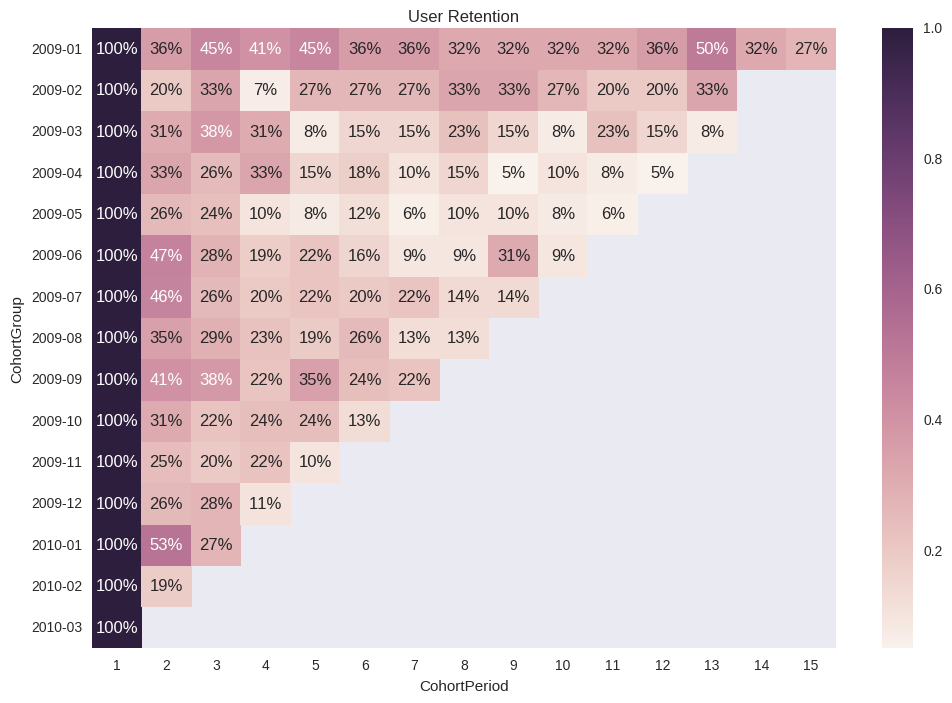

In [13]:
plt.figure(figsize=(12, 8))
plt.title('User Retention')
sbn.heatmap(user_retention.T, mask=user_retention.T.isnull(), annot=True, fmt='.0%');

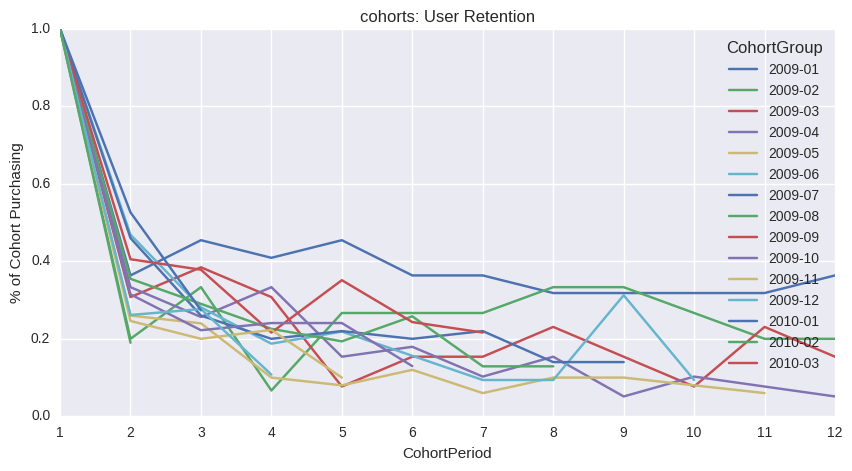

In [18]:
user_retention.plot(figsize=(10,5))
plt.title("cohorts: User Retention")
plt.xticks(np.arange(1,12.1,1))
plt.xlim(1,12)
plt.ylabel("% of Cohort Purchasing")